In [ ]:
#Estou supondo que você esteja usando as ferramentas que a IBM disponibiliza em seu site,
#caso não esteja usando, descomente as linhas abaixo
#Instalando a biblioteca Qiskit.
'''
%pip install qiskit
'''
#Importando a biblioteca e funções essenciais.
'''
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
'''
#Conectando-se com o IBM-ID.
'''
IBMQ.save_account("Seu token")
IBMQ.load_account()
'''

In [0]:
#Definindo a quantidade de bits quânticos e bits clássicos.

qr = QuantumRegister(3) #bits quânticos
cr = ClassicalRegister(3) #bits clássicos

In [0]:
%matplotlib inline

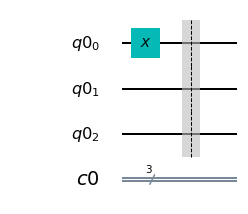

In [7]:
#Iniciando o circuito e ddefinindo o estado que queremos realizar o teleporte.

circuit = QuantumCircuit(qr,cr)
circuit.x(qr[0])
circuit.barrier()
circuit.draw(output = "mpl") #plotar pelo matplotlib

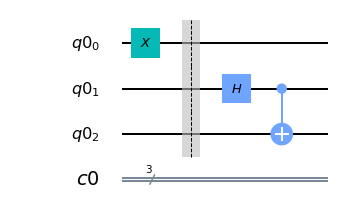

In [8]:
#Criando o par emaranhado.

circuit.h(qr[1])
circuit.cx(qr[1],qr[2])
circuit.draw(output = "mpl") 

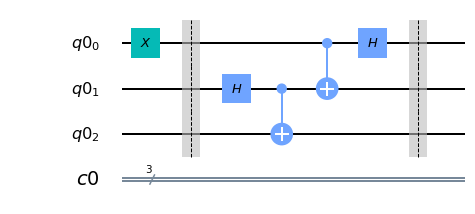

In [9]:
circuit.cx(qr[0],qr[1])
circuit.h(qr[0])
circuit.barrier()
circuit.draw(output = "mpl")

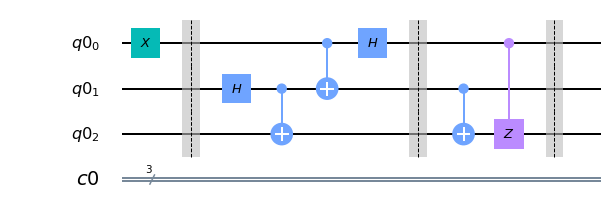

In [10]:
#Adiamos as medidas usando o princípio do adiamento de medidas.

circuit.cx(1,2)
circuit.cz(0,2)
circuit.barrier()
circuit.draw(output = "mpl")


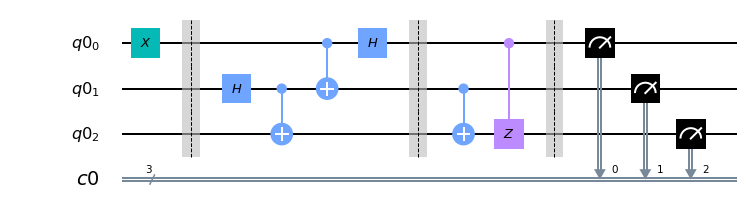

In [11]:
#Finalmente estamos realizando as medidas.

circuit.measure([qr[0],qr[1]],[cr[0],cr[1]])
circuit.measure(2,2)
circuit.draw(output = "mpl")

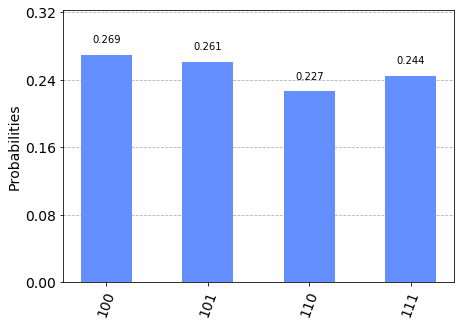

In [12]:
#Primeiramente vamos simular nosso circuito em um dispositivo clássico.

simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)


In [13]:
#Conectando no provedor e listando os dispositivos quântico disponiveis.

provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [14]:
#Selecionado o dispositivo e executando o circuito.

device = provider.get_backend('ibmq_vigo')
job = execute(circuit, backend = device, shots = 1024)
print(job.job_id())
job_monitor(job)

5e6fe9ae8ad3ae0018f82906
Job Status: job has successfully run


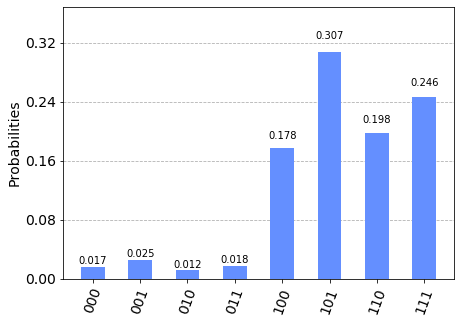

In [15]:
#Plotando os resultados.

device_result = job.result()
plot_histogram(device_result.get_counts(circuit))